1. Open terminal and enter the following 'pip install --upgrade google-cloud-BigQuery' as well as
'pip install pandas-gbq'
2. Download the new JDBC (not the ODBC driver) from
https://cloud.google.com/bigquery/docs/reference/odbc-jdbc-drivers#jdbc_release_132_1003
3. Go to the database add-on and click on the plus sign, then data source, then BigQuery
4. Go to the drivers tab, and in the section named drivers files, add a JAR File, with
the location of your download JDBC
5. Go back to the main Data Sources tab, change the authentification type to Google User Account
then for project put, all lowercase, 'projectmercuryv1'
6. Try the test button, and hopefull it opens a Chrome window for you to enter your GCP credentials
7. Tips on queries are on these sites:
https://github.com/googleapis/python-bigquery/tree/280656c47f0aca924c881bdde811702f8693a469/samples
https://github.com/googleapis/python-bigquery/tree/280656c47f0aca924c881bdde811702f8693a469/google/cloud/bigquery_v2/types
https://cloud.google.com/bigquery/docs/visualize-jupyter#browse_bigquery_resources_in_jupyterlab
https://hevodata.com/learn/bigquery-jupyter-notebook/

You may have also have to install these if there's an error:
1. pip install pandas-gbq
2. pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'
3. conda install pyarrow

In [3]:
import pandas as pd
import pandas_gbq
import pyarrow

from google.cloud import bigquery

pandas_gbq.context.project = 'projectmercuryv1'
# if you hover over some methods, you can see different
# parameters. for example, you can change 'standard' to
# 'legacy' to get traditional BQ SQL
pandas_gbq.context.dialect = 'standard'

%matplotlib inline

In [1]:
%load_ext google.cloud.bigquery

For some reason, this defaults to the tyson project,
so you have to remind it frequently what project we need.

In [4]:
client = bigquery.Client(project='projectmercuryv1')

This is one of the most basic ways to query.

In [65]:
QUERY = (
    'SELECT * FROM `bkm_dev_1_warehouse.ams_campaign` '
)

In [66]:
query_job = client.query(QUERY)  # API request
rows = query_job.result(page_size=10, max_results=10)  # Waits for query to finish

for row in rows:
    print(row.campaign_name)

nutraleaf_targeting_v1
nipple_balm_targeting_v3
Dough Whisk | SP
Test
Brown Leather
Lolli Living Lampshade, Pink Zig Zag
Sparrow Pillow - Fox
Lolli Living Lampshade, Blue
Lolli Living Sparrow Crib Skirt, Tripod
Living Textiles Muslin Jacquard Blanket, Pink Bird


You can use this to list all of the datasets in a project.

In [5]:
def list_datasets() -> None:
    client = bigquery.Client(project='projectmercuryv1')
    datasets = list(client.list_datasets())  # Make an API request.
    project = client.project

    if datasets:
        print("Datasets in project {}:".format(project))
        for dataset in datasets:
            print("\t{}".format(dataset.dataset_id))
    else:
        print("{} project does not contain any datasets.".format(project))

And now this to list all of the tables in a dataset.

In [6]:
def list_tables(dataset_id: str) -> None:
    client = bigquery.Client(project='projectmercuryv1')
    tables = client.list_tables(dataset_id)  # Make an API request.

    print("Tables contained in '{}':".format(dataset_id))
    for table in tables:
        print("{}.{}.{}".format(table.project, table.dataset_id, table.table_id))

In [7]:
list_tables(dataset_id='bkm_prod_warehouse')

Tables contained in 'bkm_prod_warehouse':
projectmercuryv1.bkm_prod_warehouse.ams_asins_report_sponsored_products
projectmercuryv1.bkm_prod_warehouse.ams_campaign
projectmercuryv1.bkm_prod_warehouse.ams_campaign_report_sponsored_display
projectmercuryv1.bkm_prod_warehouse.ams_campaign_report_sponsored_products
projectmercuryv1.bkm_prod_warehouse.ams_campaign_snapshot_history
projectmercuryv1.bkm_prod_warehouse.ams_keyword
projectmercuryv1.bkm_prod_warehouse.ams_keyword_latest
projectmercuryv1.bkm_prod_warehouse.ams_keyword_report_headline_search
projectmercuryv1.bkm_prod_warehouse.ams_keyword_report_headline_search_snapshot
projectmercuryv1.bkm_prod_warehouse.ams_keyword_report_sponsored_products
projectmercuryv1.bkm_prod_warehouse.ams_keyword_snapshot_history
projectmercuryv1.bkm_prod_warehouse.ams_portfolio
projectmercuryv1.bkm_prod_warehouse.ams_portfolio_snapshot_history
projectmercuryv1.bkm_prod_warehouse.ams_product_ads_report_sponsored_products
projectmercuryv1.bkm_prod_warehous

In [70]:
def browse_table_data(table_id: str) -> None:
    client = bigquery.Client(project='projectmercuryv1')
    table = client.get_table(table_id)  # Make an API request.
    fields = table.schema[:]  # First two columns.
    rows_iter = client.list_rows(table_id, selected_fields=fields, max_results=10)

    print("Selected {} columns from table {}.".format(len(rows_iter.schema), table_id))

    rows_iter = client.list_rows(table_id, max_results=10)
    format_string = "{!s:<16} " * len(rows_iter.schema)
    field_names = [field.name for field in rows_iter.schema]
    print(format_string.format(*field_names))  # Prints column header
    # for row in rows_iter:
    #     print(format_string.format(*row))  #

In [71]:
browse_table_data(table_id='projectmercuryv1.bkm_prod_warehouse.sp_api_seller_order_latest')

Selected 42 columns from table projectmercuryv1.bkm_prod_warehouse.sp_api_seller_order_latest.
data_start_date  data_end_date    selling_partner_id report_id        document_id      report_creation_time marketplace_id   run_id           created_at       updated_at       is_backfilled    sku              asin             product_name     amazon_order_id  merchant_order_id purchase_date    last_updated_date order_status     sales_channel    fulfillment_channel ship_service_level address_city     address_state    address_postal_code address_country  is_business_order item_status      quantity         item_price_currency item_price       item_tax         shipping_price   shipping_tax     gift_wrap_price  gift_wrap_tax    item_promotion_discount ship_promotion_discount promotion_ids    purchase_order_number price_designation order_channel    


In [72]:
list_datasets()

Datasets in project projectmercuryv1:
	Looker_Test
	bkm_dev_1_warehouse
	bkm_dev_fivetran_warehouse
	bkm_dev_replica_warehouse
	bkm_dev_test_decoding_warehouse
	bkm_dev_warehouse
	bkm_prod_warehouse
	bkm_staging
	bkm_staging_test
	bkm_staging_warehouse
	bq_dev_db
	bq_forecast
	bqml_tutorial
	daily_kind_forecast
	dbt_jekholm
	fivetran_consciousness_president_staging
	hivehq
	multivariate_forecasting
	postgres_rds_warehouse
	test_bkm_staging_warehouse
	test_demo_01
	test_staging
	test_staging_dev
	test_staging_skaii
	test_staging_walmart
	test_warehouse
	test_warehouse_dev
	test_warehouse_skaii
	test_warehouse_walmart


In [73]:
project_id = 'projectmercuryv1'

You can use a "magic" command, one that begins with two percentage signs,
to call BQ in a more efficient manner (though I don't know if it
will work in a call cases).

In [74]:
%%bigquery --project $project_id
SELECT *
FROM `projectmercuryv1.bkm_dev_1_warehouse.ams_campaign`


Query is running:   0%|          |

Downloading:   0%|          |

,account_id,campaign_id,data_snapshot_date,profile_id,_fivetran_deleted,_fivetran_synced,budget,budgettype,campaign_creation_date,campaign_end_date,...,daily_budget,deliveryprofile,portfolio_id,premium_bid_adjustment,run_id,serving_status,state,tactic,targeting_type,updated_at
0,advertising@quiverr.com,230188460414928,2020-09-30,654519822684430,False,2022-02-25 17:05:06.886000+00:00,NaN,None,2016-03-24 16:46:08,2016-06-06 07:00:00,...,255.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,auto,2020-10-01 15:16:57.349492
1,advertising@quiverr.com,237829966588463,2020-09-30,1358910521628894,False,2022-02-25 17:05:06.890000+00:00,NaN,None,2016-03-24 18:42:23,2016-06-06 07:00:00,...,768.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,auto,2020-10-01 15:16:57.349492
2,advertising@quiverr.com,69162554461784,2020-09-30,654519822684430,False,2022-02-25 17:05:06.785000+00:00,NaN,None,2016-08-16 22:43:18,NaT,...,20.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_PAUSED,paused,None,manual,2020-10-01 15:16:57.349492
3,advertising@quiverr.com,21838627103157,2020-09-30,2548290150447617,False,2022-02-25 17:05:06.754000+00:00,NaN,None,2016-10-24 18:44:44,NaT,...,50.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,ADVERTISER_ARCHIVED,archived,None,manual,2020-10-01 15:16:57.349492
4,advertising@quiverr.com,61188954657870,2020-09-30,493214053858924,False,2022-02-25 17:05:06.781000+00:00,NaN,None,2017-05-09 18:41:40,NaT,...,10.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,ADVERTISER_ARCHIVED,paused,None,auto,2020-10-01 15:16:57.349492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,advertising@quiverr.com,133345847193502,2020-09-30,297263927480587,False,2022-02-25 17:05:06.828000+00:00,NaN,None,2020-05-06 18:54:11,NaT,...,15.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,manual,2020-10-01 15:16:57.349492
3563,advertising@quiverr.com,72243784168035,2020-09-30,297263927480587,False,2022-02-25 17:05:06.786000+00:00,NaN,None,2020-05-06 18:54:11,NaT,...,15.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,manual,2020-10-01 15:16:57.349492
3564,advertising@quiverr.com,51872661668191,2020-09-30,297263927480587,False,2022-02-25 17:05:06.776000+00:00,NaN,None,2020-05-06 18:54:11,NaT,...,15.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,manual,2020-10-01 15:16:57.349492
3565,advertising@quiverr.com,121899563935030,2020-09-30,297263927480587,False,2022-02-25 17:05:06.821000+00:00,NaN,None,2020-05-06 18:54:11,NaT,...,15.0,None,<NA>,False,scheduled__2020-09-29T16:00:00,CAMPAIGN_ARCHIVED,archived,None,manual,2020-10-01 15:16:57.349492


By putting the "df" after the magic command, I can save the output to DataSpell

In [75]:
%%bigquery df --project projectmercuryv1
SELECT serving_status, SUM(daily_budget) as budget
FROM `projectmercuryv1.bkm_dev_1_warehouse.ams_campaign`
GROUP BY serving_status

Query is running:   0%|          |

Downloading:   0%|          |

There are quite a few plots you can do with the data you save to DataSpell.

<Axes: xlabel='serving_status'>

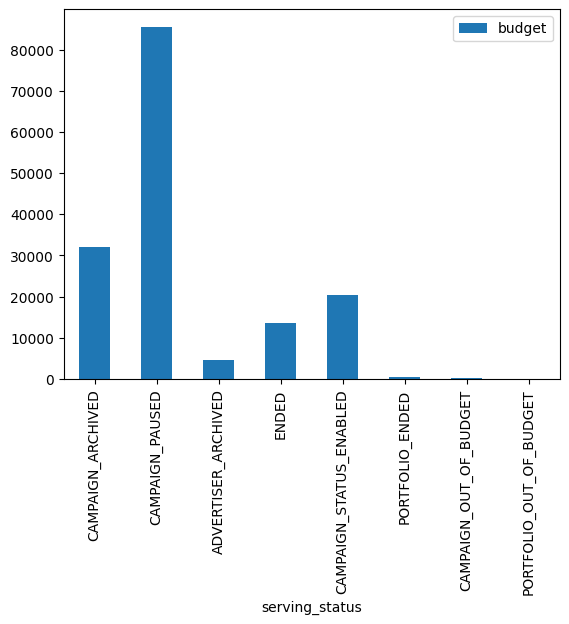

In [76]:
df.plot(kind="bar", x="serving_status", y="budget")

In [77]:
%%bigquery test_table --project projectmercuryv1
SELECT *
FROM `projectmercuryv1.bkm_dev_1_warehouse.ams_campaign`

Query is running:   0%|          |

Downloading:   0%|          |

This uses yet another way to write the query, but the last line transforms
the output to a Pandas dataframe, which we save to a csv in the next cell.

In [8]:
# sql = """
# /*
# ###INSTRUCTIONS###
# 1). Change the 'client_id' field in the client CTE. This will filter all data to that particular client
# 2). In the Media Data CTE, ensure only one of the LEFT JOINs is un-commented. Further instruction in CTE
# 3). Run Query
#         */
#
#         WITH
# client AS(
#     SELECT
# '47' AS client_id
#         /*
#         This id will filter data below, replace as needed;
# Native =  279
# EO = 47
#      */
# ),
# tagging AS(
# SELECT * FROM `mercury-analytics-345523.prod.master_tag_data`
# WHERE tag_group = 'Primary Search Strategy' AND client_id = (SELECT * FROM client)
# ),
# --temp_tagging is used to quickly make tags for campaigns in the event a client doesnt have any in the system
# temp_tagging AS(
# SELECT DISTINCT
# CAST(campaign_id AS STRING) AS tag_entity,
# campaign_name,
# CASE
# WHEN campaign_name LIKE '%Branded%' AND campaign_name NOT LIKE '%Non%' THEN 'Branded'
# WHEN campaign_name LIKE '%Auto%' THEN 'Auto'
# WHEN campaign_name LIKE '%Category%' THEN 'Category'
# ELSE 'Competitive'
# END AS tag_value
# FROM `mercury-analytics-345523.prod.fct_combined_search_dsp`
# WHERE client_id = (SELECT * FROM client)
# ),
# media_data AS(
# SELECT
# DATE_TRUNC(reporting_date,WEEK) AS reporting_date,
# CONCAT(campaign_type,"_",tag_value) AS type,
# IFNULL(SUM(spend),0) AS spend
# FROM `mercury-analytics-345523.prod.fct_combined_search_dsp` d
# /*
# Uncomment one of the LEFT JOINs below for tagging or temp_tagging (NOT BOTH), depending on if tagging already exists for client or not
# If tagging exists, comment out the temp_tagging
# If tagging doesn't exist, comment out the tagging and add tagging logic to the temp_tagging CTE
# */
# --LEFT JOIN temp_tagging t ON t.tag_entity = CAST(d.campaign_id AS STRING)
# LEFT JOIN tagging t ON t.tag_entity = CAST(d.campaign_id AS STRING)
# WHERE d.client_id = (SELECT * FROM client)
# GROUP BY 1,2
# ),
# retail_data AS(
# SELECT
# DATE_TRUNC(reporting_date,WEEK) AS reporting_date,
# SUM(units_shipped) AS shipped_units,
# SUM(shipped_revenue) AS shipped_revenue
# FROM `mercury-analytics-345523.prod.fct_master_asin_data`
# WHERE distributor_view = 'Sourcing' AND program = 'Amazon Retail' AND client_id = (SELECT * FROM client)
# GROUP BY 1
# ORDER BY 1 DESC
# ),
# pivot_d AS(
# SELECT * FROM media_data
# PIVOT(
# SUM(spend) AS spend
# FOR type IN (
# --'sponsoredBrands_Undefined',
# --'sponsoredProducts_Undefined',
# --'sponsoredDisplay_Undefined',
# 'sponsoredBrands_Branded',
# 'sponsoredProducts_Branded',
# 'sponsoredDisplay_Branded',
# 'sponsoredBrands_Category',
# 'sponsoredProducts_Category',
# 'sponsoredDisplay_Category',
# 'sponsoredBrands_Competitive',
# 'sponsoredProducts_Competitive',
# 'sponsoredDisplay_Competitive',
# 'sponsoredBrands_Auto',
# 'sponsoredProducts_Auto',
# 'sponsoredDisplay_Auto'
# )
# )
# )
# SELECT
# COALESCE(pd.reporting_date,rd.reporting_date) AS reporting_date,
# (
#         --COALESCE(spend_sponsoredDisplay_Undefined,0) +
#         COALESCE(spend_sponsoredDisplay_Branded,0) +
#         COALESCE(spend_sponsoredDisplay_Category,0) +
#         COALESCE(spend_sponsoredDisplay_Competitive,0) +
#         COALESCE(spend_sponsoredDisplay_Auto,0)
# ) AS display_s,
# --spend_sponsoredBrands_Undefined AS b_undefined_s,
# spend_sponsoredBrands_Branded AS b_branded_s,
# spend_sponsoredBrands_Category AS b_category_s,
# spend_sponsoredBrands_Competitive AS b_competitive_s,
# spend_sponsoredBrands_Auto AS b_auto_s,
# --spend_sponsoredProducts_Undefined AS p_undefined_s,
# spend_sponsoredProducts_Branded AS p_branded_s,
# spend_sponsoredProducts_Category AS p_category_s,
# spend_sponsoredProducts_Competitive AS p_competitive_s,
# spend_sponsoredProducts_Auto AS p_auto_s,
# shipped_units,
# shipped_revenue
# FROM pivot_d pd
# FULL JOIN retail_data rd ON rd.reporting_date = pd.reporting_date
# ORDER BY 1 DESC
# """
# ams_campaign = client.query(sql).to_dataframe()

Forbidden: 403 Access Denied: Table mercury-analytics-345523:prod.fct_combined_search_dsp: User does not have permission to query table mercury-analytics-345523:prod.fct_combined_search_dsp, or perhaps it does not exist in location US.

Location: US
Job ID: cdb464a5-0fe2-4b2d-8027-354ef5d46b6d


In [79]:
ams_campaign.to_csv('ams_campaign', index=False)